In [1]:
import numpy as np
import pandas as pd

In [2]:
from fuzzingbook.GrammarFuzzer import GrammarFuzzer
from grammar import *

In [3]:
from fuzzer import insert_runner

Using specified configuration file: -f
Using random seed specified in configuration file: 42


In [13]:
from matplotlib import pyplot

In [4]:
with open('rewards.txt.', 'r') as f:
    data = f.readlines()

In [6]:
data = [int(i) for i in data]

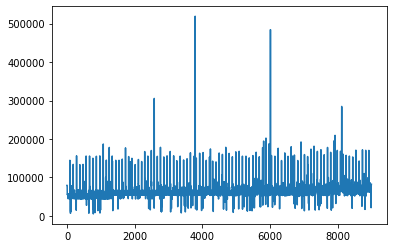

In [36]:
pyplot.plot(data)

In [33]:
mean_len = 100

In [34]:
means = [sum(data[i:i+mean_len])/mean_len for i in range(1, len(data)-mean_len)]

In [43]:
means[-10:]

[74547.61,
 74128.09,
 74120.7,
 73912.55,
 73704.4,
 73665.18,
 73729.36,
 73793.54,
 73886.75,
 73713.96]

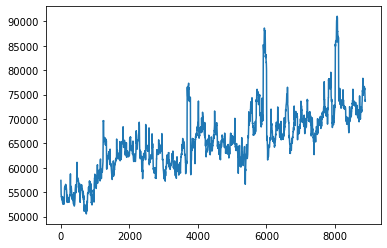

In [35]:
pyplot.plot(means)

In [24]:
CONFIG_PATH = 'config.json'
config = Config(CONFIG_PATH)

In [65]:
fuzzer = GrammarFuzzer(grammar=sql_grammar(config),
                       start_symbol='<Query>', max_nonterminals=5)

In [70]:
tree = ('<Query>', None)

In [96]:
tree2  = fuzzer.expand_tree_once(tree)

In [97]:
tree2

('<Query>',
 [('SELECT ', []),
  ('<SelList>', None),
  (' FROM ', []),
  ('<FromList>', None),
  (' WHERE ', []),
  ('<Condition>', None)])

In [99]:
fuzzer.expand_tree_once(tree2)

('<Query>',
 [('SELECT ', []),
  ('<SelList>', [('<Attribute>', None)]),
  (' FROM ', []),
  ('<FromList>', [('<Relation>', None)]),
  (' WHERE ', []),
  ('<Condition>', None)])

In [55]:
a = fuzzer.fuzz_tree()

b


In [57]:
a

('<Query>',
 [('SELECT ', []),
  ('<SelList>',
   [('<SelList>',
     [('<SelList>', [('<Attribute>', [('ssn', [])])]),
      (', ', []),
      ('<Attribute>', [('phone_number', [])])]),
    (', ', []),
    ('<Attribute>', [('email_address', [])])]),
  (' FROM ', []),
  ('<FromList>', [('<Relation>', [('Users_DB', [])])]),
  (' WHERE ', []),
  ('<Condition>',
   [('<Comparison>',
     [('ssn ', []),
      ('<StringComparator>', [('=', [])]),
      (' "', []),
      ('<SSN>',
       [('<Digit>', [('4', [])]),
        ('<Digit>', [('5', [])]),
        ('<Digit>', [('9', [])]),
        ('-', []),
        ('<Digit>', [('2', [])]),
        ('<Digit>', [('2', [])]),
        ('-', []),
        ('<Digit>', [('3', [])]),
        ('<Digit>', [('3', [])]),
        ('<Digit>', [('7', [])]),
        ('<Digit>', [('8', [])])]),
      ('"', [])])])])

In [19]:
insert_runner(1, 0)

b
STATEMENT: INSERT INTO Users_DB VALUES ("ro'ayifur", "67", "o@b.edu", "(430)247-8686", "943-39-5055")
Successful Insert ✓


('SELECT phone_number, name, email_address FROM Users_DB WHERE email_address = "o@b.edu"',
 {'name': "ro'ayifur",
  'age': 67,
  'email_address': 'o@b.edu',
  'phone_number': '(430)247-8686',
  'ssn': '943-39-5055'},
 [('(430)247-8686', "ro'ayifur", 'o@b.edu')])

In [2]:
df = pd.read_csv('row.csv')

In [3]:
df= df.drop('Unnamed: 0', axis=1)

In [4]:
df['0']

0      0 days 00:00:00.104765
1      0 days 00:00:00.045002
2      0 days 00:00:00.045370
3      0 days 00:00:00.045083
4      0 days 00:00:00.056405
                ...          
995    0 days 00:00:00.045336
996    0 days 00:00:00.056231
997    0 days 00:00:00.045247
998    0 days 00:00:00.045170
999    0 days 00:00:00.045264
Name: 0, Length: 1000, dtype: object

In [5]:
df['0'][0][-6:-4]

'10'

In [6]:
df['0'] = [int(i[-6:-4]) for i in df['0'].values]

In [7]:
df.max() - df.min()

0    45
dtype: int64

<AxesSubplot:>

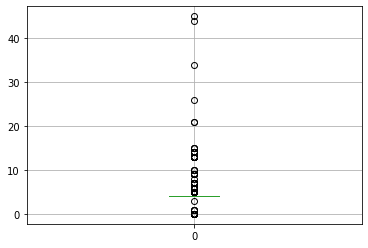

In [8]:
df.boxplot()

In [9]:
a = [1, 3, 2, 5, 1, 1, 3, 5, 5, 1, 5, 98, 1, 1, 5, 1, 26, 98, 1, 1, 3, 1, 2, 1, 5, 1, 5, 1, 1, 1, 5, 98, 5, 98, 1, 2, 3, 1, 5, 1, 1, 5, 1, 1, 1, 5, 98, 98, 5, 1, 2, 5, 1, 3, 1, 5, 2, 3, 1, 2, 2, 1, 2, 26, 26, 26, 2, 26, 1, 3, 1, 2, 1, 5, 5, 3, 2, 1, 3, 1, 1, 98, 1, 26, 1, 1, 5, 26, 98, 5, 1, 1, 1, 1, 2, 3, 3, 1, 5]

In [10]:
max(a)

98

In [11]:
with open('res.txt', 'r') as f:
    data = f.readlines()

In [12]:
data = [i[:-1] for i in data]

In [13]:
data

['SELECT ssn FROM Users_DB WHERE name = "vo" OR age <= "21"',
 'SELECT ssn FROM Users_DB WHERE name = "vo" OR age <= "21"',
 'SELECT ssn FROM Users_DB WHERE name = "vo" OR age <= "21"',
 'SELECT age FROM Users_DB WHERE phone_number <> "(743)482-5839" ',
 'SELECT age FROM Users_DB WHERE phone_number <> "(743)482-5839" ',
 'SELECT age FROM Users_DB WHERE phone_number <> "(743)482-5839" ',
 'SELECT age FROM Users_DB WHERE phone_number <> "(743)482-5839" ',
 'SELECT age FROM Users_DB WHERE phone_number <> "(743)482-5839" ',
 'SELECT ssn FROM Users_DB WHERE age <= "50" OR age < "79" AND name = "w"',
 'SELECT age, ssn FROM Users_DB WHERE ssn = "883-09-1058"',
 'SELECT age, age FROM Users_DB WHERE ssn = "784-78-9007" AND age = "46"',
 'SELECT phone_number, phone_number, phone_number, name FROM Users_DB WHERE ssn = "013-76-4332"',
 'SELECT age, name FROM Users_DB WHERE age <= "91" AND age = "77" OR age = "99"',
 'SELECT phone_number FROM Users_DB WHERE age >= "30" OR email_address = "j@d.edu"'

In [16]:
q = {'<Condition>': [{'<Comparison> ': 0}, {'<Condition>  AND  <Comparison> ': 0}, {'<Condition>  OR  <Comparison> ': 0}], '<SelList>': [{'<Attribute> ': 0}, {'<SelList> ,  <Attribute> ': 0}], '<Attribute>': [{'name ': 0}, {'age ': 0}, {'email_address ': 0}, {'phone_number ': 0}, {'ssn ': 0}]}

In [29]:
q.keys()

dict_keys(['<Condition>', '<SelList>', '<Attribute>'])

In [32]:
q['<SelList>']

[{'<Attribute> ': 0}, {'<SelList> ,  <Attribute> ': 0}]

In [18]:
import random

In [53]:
s=[random.choice(i) for i in q.values()]

In [54]:
s

[{'<Comparison> ': 0}, {'<Attribute> ': 0}, {'age ': 0}]

In [55]:
random.choice(s)

{'age ': 0}

In [75]:
df['data'][996]

'SELECT ssn, phone_number FROM Users_DB WHERE age >= "80" OR age = "3"'

In [67]:
df['data'][997]

'SELECT phone_number FROM Users_DB WHERE age < "8" AND age < "13" OR age >= "62" AND age >= "25"'

In [66]:
df['data'][998]

'SELECT age, ssn FROM Users_DB WHERE age = "69"'

In [63]:
df['data'][999]

'SELECT email_address, email_address FROM Users_DB WHERE age = "13" OR age < "64"'